In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
#Inspecting the data:

#Finding column names and types
inspector = inspect(engine)
measurement = inspector.get_columns('measurement')
station = inspector.get_columns('station')

for s in station:
    print(s["name"], s["type"])
    
for m in measurement:
    print(m["name"], m["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
stations = session.query(Station.station)
for row in stations:
    print(row)

('USC00519397',)
('USC00513117',)
('USC00514830',)
('USC00517948',)
('USC00518838',)
('USC00519523',)
('USC00519281',)
('USC00511918',)
('USC00516128',)


# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#Update date column to be in datetime format
#dtformat = session.query(Measurement.date).all()

#dtformat = [dt.date(x) for x in dtformat]
    
#session.commit()


dates = dt.date(2011, 12, 31)

#print(dir(dates))
#print(dates.strptime("%Y-%m-%d"))

type(dates)

datetime.date

In [13]:
#Find the last date in the database
last_date = session.query(Measurement.date).\
    order_by(desc(Measurement.date)).first()
print((last_date[0]))

ld = dt.datetime.strptime(last_date[0], "%Y-%m-%d")

year = dt.timedelta(days = 365)
last_year = ld - year
last_year = last_year.date()
print(last_year)



2017-08-23
2016-08-23


In [14]:
# Perform a query to retrieve the data and precipitation scores
#precip = session.execute("SELECT DATE, PRCP FROM MEASUREMENT WHERE DATE > 2017-08-23")
#for row in precip:
    #print(row)
precip2 = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > last_year)

d = []
p = []
for row in precip2:
    print(row)
    d.append(row[0])
    p.append(row[1])

('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('2016-10-11', 0.0)
('

('2017-03-16', None)
('2017-03-17', 0.06)
('2017-03-18', 0.0)
('2017-03-20', None)
('2017-03-21', 0.0)
('2017-03-22', 0.0)
('2017-03-23', 0.0)
('2017-03-24', 0.15)
('2017-03-27', None)
('2017-03-28', 0.0)
('2017-03-29', 0.03)
('2017-03-30', 0.03)
('2017-03-31', 0.0)
('2017-04-01', 0.0)
('2017-04-02', 0.0)
('2017-04-03', 0.09)
('2017-04-04', 0.0)
('2017-04-05', 0.07)
('2017-04-06', 0.0)
('2017-04-07', 0.0)
('2017-04-09', None)
('2017-04-10', 0.0)
('2017-04-11', 0.16)
('2017-04-12', 0.29)
('2017-04-13', 0.0)
('2017-04-14', 0.29)
('2017-04-17', None)
('2017-04-18', 0.12)
('2017-04-19', 0.0)
('2017-04-20', 0.0)
('2017-04-21', 1.05)
('2017-04-22', 0.7)
('2017-04-24', None)
('2017-04-25', 0.0)
('2017-04-26', 0.14)
('2017-04-27', 0.02)
('2017-04-28', 0.09)
('2017-04-29', 0.95)
('2017-04-30', 1.17)
('2017-05-01', 0.03)
('2017-05-02', 0.01)
('2017-05-03', 0.01)
('2017-05-04', 0.08)
('2017-05-05', 0.28)
('2017-05-06', 0.06)
('2017-05-08', 0.95)
('2017-05-09', 0.52)
('2017-05-10', 0.0)
('2017-05-

('2017-03-14', 0.0)
('2017-03-15', 0.0)
('2017-03-16', 0.0)
('2017-03-17', 0.35)
('2017-03-18', 0.0)
('2017-03-19', 0.0)
('2017-03-20', 0.0)
('2017-03-21', 0.0)
('2017-03-22', 0.0)
('2017-03-23', 0.02)
('2017-03-24', 0.07)
('2017-03-25', 0.43)
('2017-03-26', 0.0)
('2017-03-27', 0.0)
('2017-03-28', 0.0)
('2017-03-29', 0.08)
('2017-03-30', 0.0)
('2017-03-31', 0.0)
('2017-04-01', 0.0)
('2017-04-02', 0.0)
('2017-04-03', 0.0)
('2017-04-04', 0.0)
('2017-04-05', 0.0)
('2017-04-06', 0.0)
('2017-04-07', 0.0)
('2017-04-09', None)
('2017-04-10', 0.0)
('2017-04-11', 0.0)
('2017-04-12', 0.0)
('2017-04-13', 0.0)
('2017-04-14', 0.36)
('2017-04-15', 0.0)
('2017-04-16', 0.0)
('2017-04-17', 0.3)
('2017-04-18', 0.15)
('2017-04-19', 0.0)
('2017-04-20', 0.35)
('2017-04-21', 2.36)
('2017-04-24', None)
('2017-04-25', 0.0)
('2017-04-26', 0.01)
('2017-04-27', 0.0)
('2017-04-28', 0.0)
('2017-04-29', 6.25)
('2017-04-30', 1.31)
('2017-05-01', 0.07)
('2017-05-02', 0.0)
('2017-05-03', 0.0)
('2017-05-04', 0.0)
('201

('2017-08-17', 0.01)
('2017-08-18', 0.06)
('2016-08-24', 1.45)
('2016-08-25', 0.11)
('2016-08-27', None)
('2016-08-28', 2.07)
('2016-08-29', 0.9)
('2016-08-30', 0.05)
('2016-08-31', 2.46)
('2016-09-01', 0.01)
('2016-09-02', 0.03)
('2016-09-03', 1.0)
('2016-09-04', 0.44)
('2016-09-05', 0.18)
('2016-09-06', 1.0)
('2016-09-07', 1.35)
('2016-09-08', 0.15)
('2016-09-09', 0.35)
('2016-09-10', 1.16)
('2016-09-11', 0.6)
('2016-09-12', 1.04)
('2016-09-13', 1.2)
('2016-09-14', 6.7)
('2016-09-15', 3.35)
('2016-09-16', 0.61)
('2016-09-17', 0.23)
('2016-09-18', 0.42)
('2016-09-19', 0.25)
('2016-09-20', 0.43)
('2016-09-21', 1.02)
('2016-09-22', 0.75)
('2016-09-23', 0.33)
('2016-09-24', 0.27)
('2016-09-25', 0.04)
('2016-09-26', 1.02)
('2016-09-27', 1.0)
('2016-09-28', 0.05)
('2016-09-29', 1.49)
('2016-09-30', 0.38)
('2016-10-01', 1.02)
('2016-10-02', 0.61)
('2016-10-03', 0.46)
('2016-10-04', 3.46)
('2016-10-05', 0.81)
('2016-10-06', 0.04)
('2016-10-07', 0.01)
('2016-10-08', 0.04)
('2016-10-09', 0.0)


In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame({"Date" : d, "Precipitation" : p}).set_index(["Date"])
precip_df.head()

,Precipitation
Date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


In [16]:
# Sort the dataframe by date
precip_df = precip_df.sort_values("Date")
precip_df = precip_df.dropna()
precip_df.head()

,Precipitation
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
2016-08-24,1.45


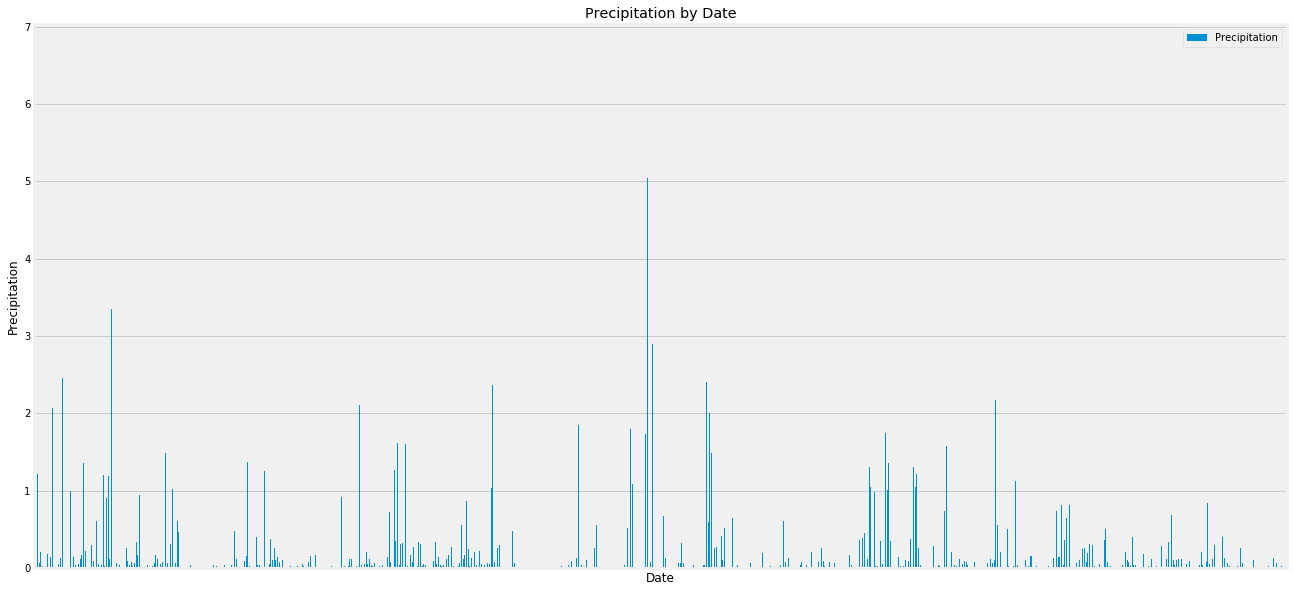

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(kind = "bar", figsize=(20,10))
plt.title("Precipitation by Date")
plt.ylabel("Precipitation")
plt.xlabel("Date")
plt.xticks([])
plt.show()

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [19]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(func.count(Station.id)).all()
print(stations[0][0])

9


In [79]:
station_id = session.query((Measurement.station).distinct())
for n in station_id:
    print(n[0])

USC00519397
USC00513117
USC00514830
USC00517948
USC00518838
USC00519523
USC00519281
USC00511918
USC00516128


In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_count = session.query(Measurement.station, Station.name, func.count(Measurement.id)).\
    join(Station, Measurement.station == Station.station).\
    group_by(Measurement.station).\
    order_by(desc(func.count(Measurement.id))).distinct()

for row in station_count:
    print(row)
    
    #How do I get this in a variable?

('USC00519281', 'WAIHEE 837.5, HI US', 2772)
('USC00519397', 'WAIKIKI 717.2, HI US', 2724)
('USC00513117', 'KANEOHE 838.1, HI US', 2709)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979)
('USC00517948', 'PEARL CITY, HI US', 1372)
('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)


In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature at the most active station?

highest_t = session.query(Measurement.station, Station.name, func.max(Measurement.tobs)).\
    join(Station, Measurement.station == Station.station).\
    filter(Measurement.station == 'USC00519281')

for row in highest_t:
    print(row)
    
lowest_t = session.query(Measurement.station, Station.name, func.min(Measurement.tobs)).\
    join(Station, Measurement.station == Station.station).\
    filter(Measurement.station == 'USC00519281')  

for row in lowest_t:
    print(row)
    
average_t = session.query(Measurement.station, Station.name, func.avg(Measurement.tobs)).\
    join(Station, Measurement.station == Station.station).\
    filter(Measurement.station == 'USC00519281')  

for row in average_t:
    print(row) 


('USC00519281', 'WAIHEE 837.5, HI US', 85.0)
('USC00519281', 'WAIHEE 837.5, HI US', 54.0)
('USC00519281', 'WAIHEE 837.5, HI US', 71.66378066378067)


In [24]:
# Choose the station with the highest number of temperature observations.

station_temp_count = session.query(Measurement.station, Station.name, func.count(Measurement.tobs)).\
    join(Station, Measurement.station == Station.station).\
    group_by(Measurement.station).\
    order_by(desc(func.count(Measurement.id))).distinct()

for row in station_temp_count:
    print(row)
     

('USC00519281', 'WAIHEE 837.5, HI US', 2772)
('USC00519397', 'WAIKIKI 717.2, HI US', 2724)
('USC00513117', 'KANEOHE 838.1, HI US', 2709)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979)
('USC00517948', 'PEARL CITY, HI US', 1372)
('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)


In [25]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_data = session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.station == "USC00519281").\
    filter(Measurement.date > last_year)

temps = []
stations = []

for row in temp_data:
    #print(row)
    #temp_data_data = row[1]
    temps.append(row[1])
    stations.append(row[0])
    
temp_df = pd.DataFrame({"Station" : stations, "Temperatures" : temps})    
#temp_df.head()

Text(0.5, 0, 'Temperature (Farenheit)')

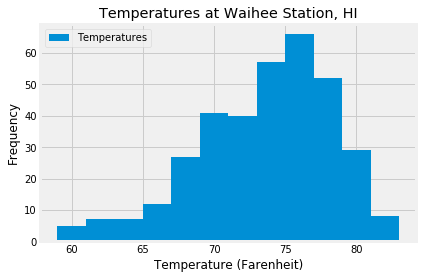

In [26]:
temp_df.plot.hist(bins = 12)
plt.title("Temperatures at Waihee Station, HI")
plt.xlabel("Temperature (Farenheit)")

![precipitation](Images/station-histogram.png)

In [27]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [28]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

temp_array = calc_temps('2017-07-14','2017-07-21')

tmin = temp_array[0][0]
tavg = temp_array[0][1]
tmax = temp_array[0][2]

print(temp_array[0])

trip_df = pd.DataFrame({"Minimum": tmin, 
                        "Average": tavg, 
                        "Maximum": tmax}, 
                        index = ["Temperature"])
trip_df
# Use "Trip Avg Temp" as your Title

(72.0, 78.62745098039215, 83.0)


,Minimum,Average,Maximum
Temperature,72.0,78.627451,83.0


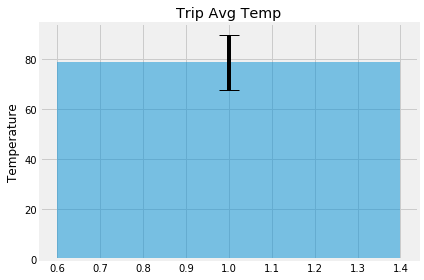

In [38]:
# Plot the results from your previous query as a bar chart. 
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

fig, ax = plt.subplots()
ax.bar(1, tavg, yerr=(tmax-tmin), alpha = 0.5, capsize=10)
ax.set_ylabel("Temperature")
ax.set_title("Trip Avg Temp")
plt.tight_layout()

In [48]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
rainfall = session.query(Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)).\
                join(Station, Measurement.station == Station.station).\
                group_by(Station.name)
sid = []
sname = []
lat = []
long = []
elev = []
rain = []

for row in rainfall:
    sid.append(row[0])
    sname.append(row[1])
    lat.append(row[2])
    long.append(row[3])
    elev.append(row[4])
    rain.append(row[5])
    
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
rain_df = pd.DataFrame({"Station ID" : sid, "Station Name" : sname, "Latitude" : lat,
                       "Longitude" : long, "Elevation" : elev, "Rainfall" : rain})
rain_df = rain_df.sort_values("Rainfall", ascending = False)
rain_df

,Station ID,Station Name,Latitude,Longitude,Elevation,Rainfall
3,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,1068.09
6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,588.64
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,382.62
8,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,295.68
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,234.49
7,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,131.62
0,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9,92.68
5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6,70.87
4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,43.44


## Optional Challenge Assignment

In [49]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [64]:
# calculate the daily normals for your trip
#These are my dates: '2017-07-14','2017-07-21'

normals= []
ymin = []
yavg = []
ymax = []
tripdate = []

start = 14
for x in range(8):
    trip = (f"07-{start}")
    tripdate.append(trip)
    daily = daily_normals(f"07-{start}")
    normals.append(daily)
    ymin.append(daily[0][0])
    yavg.append(daily[0][1])
    ymax.append(daily[0][2])
    start = start + 1
print(normals)    


[[(61.0, 76.2280701754386, 82.0)], [(68.0, 76.2542372881356, 82.0)], [(70.0, 76.34482758620689, 83.0)], [(70.0, 76.30188679245283, 83.0)], [(72.0, 76.63793103448276, 83.0)], [(68.0, 75.89090909090909, 83.0)], [(69.0, 75.46296296296296, 82.0)], [(69.0, 76.9245283018868, 83.0)]]


In [65]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
trip_temps_df = pd.DataFrame({"Trip Date": tripdate, "Minimum Temperature" : ymin, "Average Temperature" : yavg, "Maximum Temperature" : ymax}).set_index("Trip Date")
trip_temps_df

,Minimum Temperature,Average Temperature,Maximum Temperature
Trip Date,,,
07-14,61.0,76.228070,82.0
07-15,68.0,76.254237,82.0
07-16,70.0,76.344828,83.0
07-17,70.0,76.301887,83.0
07-18,72.0,76.637931,83.0
07-19,68.0,75.890909,83.0
07-20,69.0,75.462963,82.0
07-21,69.0,76.924528,83.0


Text(0, 0.5, 'Temperatures (F)')

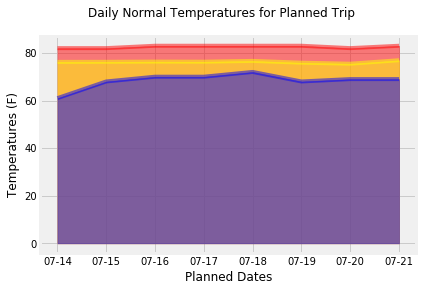

In [77]:
# Plot the daily normals as an area plot with `stacked=False`
fig, axs = plt.subplots()
ax0 = plt.plot(tripdate, ymin, alpha = 0.5, color = "blue")
ax1 = plt.plot(tripdate, yavg, alpha = 0.5, color = "yellow")
ax2 = plt.plot(tripdate, ymax, alpha = 0.5, color = "red")
ax5 = plt.fill_between(tripdate, ymax, alpha = 0.5, color = "red")
ax4 = plt.fill_between(tripdate, yavg, alpha = 0.5, color = "yellow")
ax3 = plt.fill_between(tripdate, ymin, alpha = 0.5, color = "blue")
fig.suptitle("Daily Normal Temperatures for Planned Trip")
axs.set_xlabel("Planned Dates")
axs.set_ylabel("Temperatures (F)")
